# Problem statement: Use of Deep learning to find the defect in the given steel   bar

# Image Augmentation

            It is a technique that can be used to artificially expand the size of training dataset, by creating modified versions of the images in the dataset,It is also used to expand the training dataset in order to improve the performane and ability of the model to generalise.

            This technique has helped us a lot in our model because the data was manually collected and wasn't sufficient to train our model. Due to insufficient data the model prediction accuracy will decrease.So, it was mandatory for us to use image augumentation to increase the accuracy of our model.

In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from matplotlib import pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
directory = "Dataset/"
classLabel = 0
count = 0
X, y = [], []
m, n = 200, 200

buck10.jpg


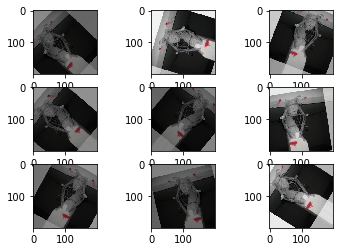

buck11.jpg


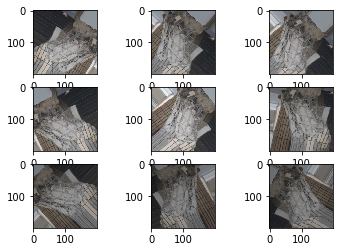

buck2.jpg


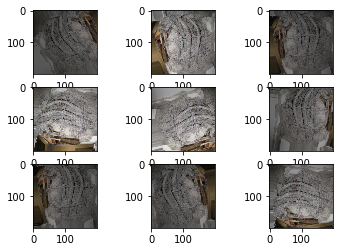

buck3.jpg


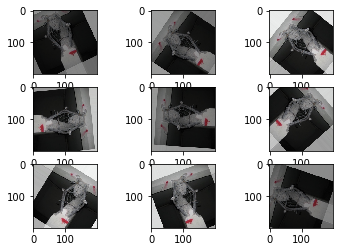

buck4.jpg


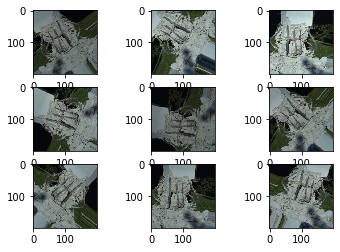

buck6.jpg


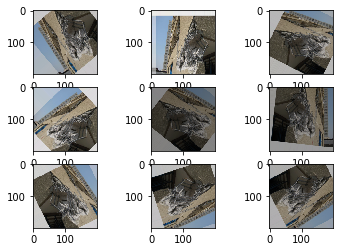

buck7.jpg


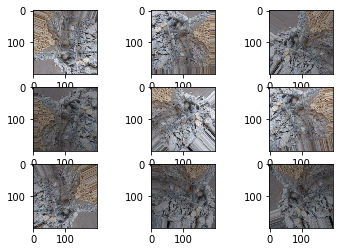

buck9.jpg


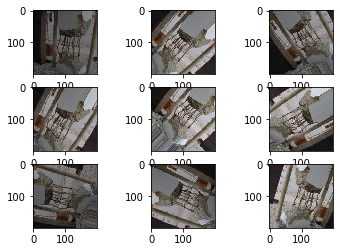

28.jpg


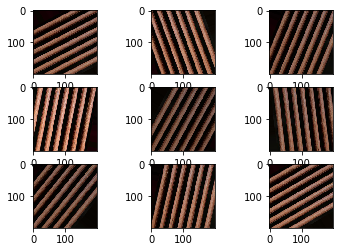

29.jpg


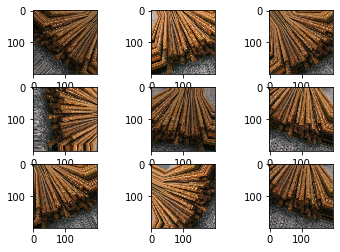

30.jpg


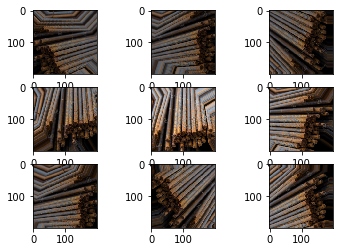

31.jpg


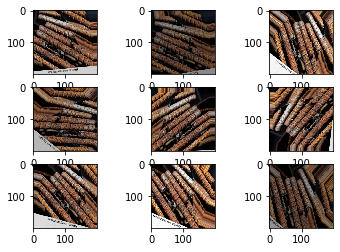

32.jpg


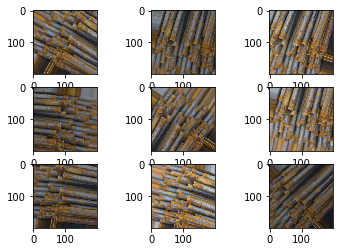

33.jpg


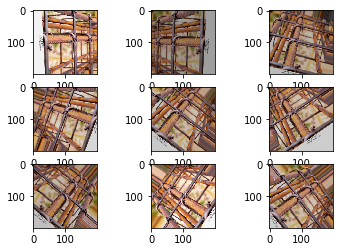

34.jpg


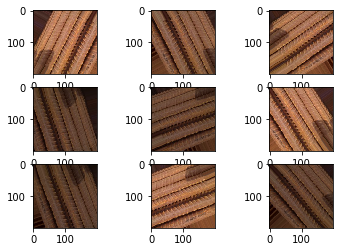

35.jpg


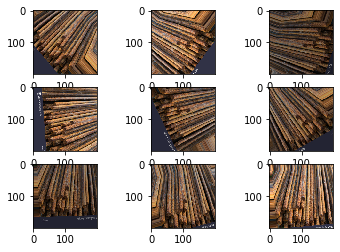

36.jpg


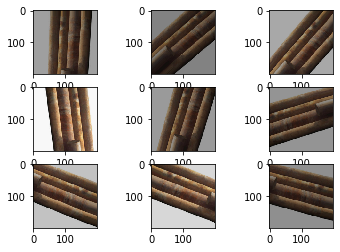

37.jpg


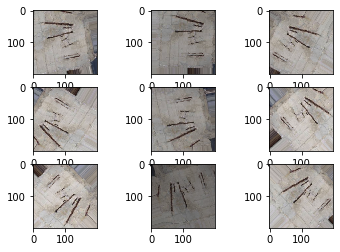

38.jpg


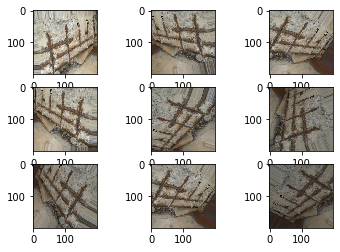

39.png


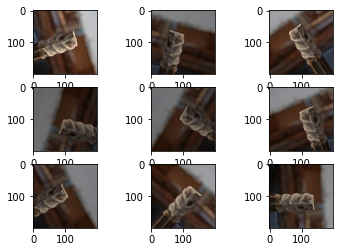

40.png


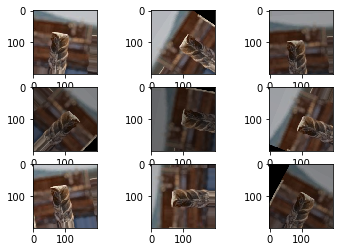

41.png


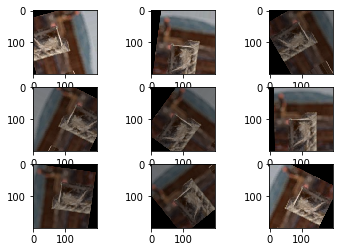

42.png


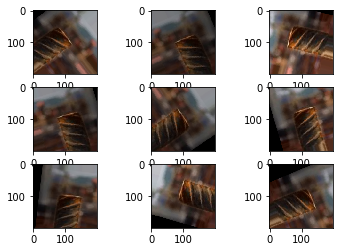

43.jpg


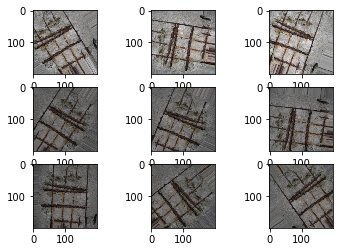

44.png


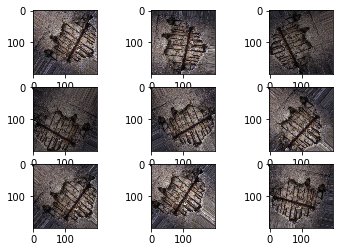

46.jpg


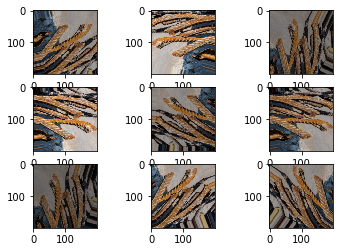

47.jpg


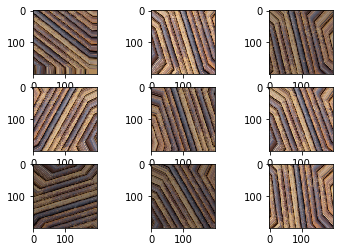

48.jpg


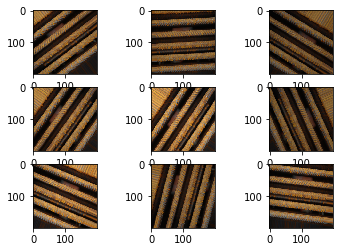

49.jpg


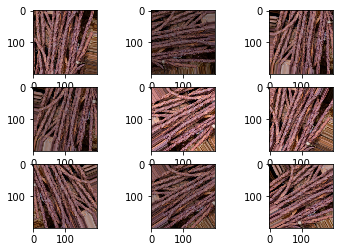

50.jpg


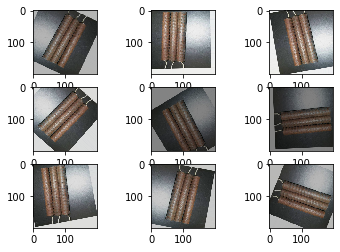

corrosion1.jpg


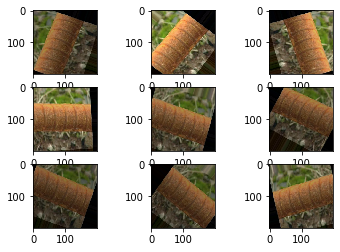

corrosion3.jpg


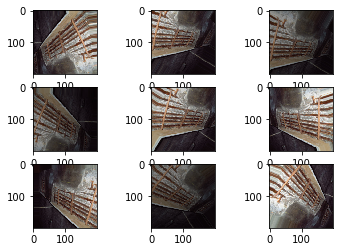

corrosion4.jpg


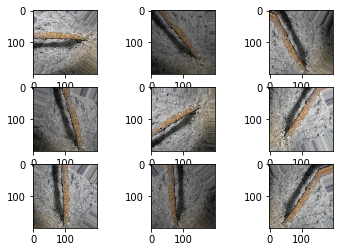

corrosion5.jpg


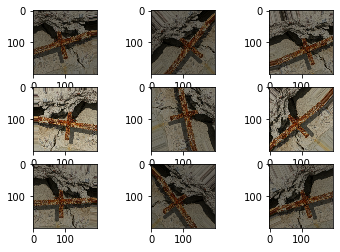

corrosion6.jpg


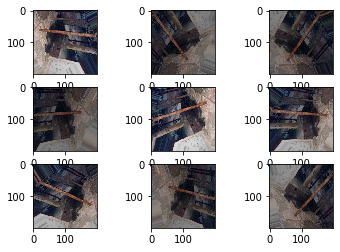

corrosion7.jpg


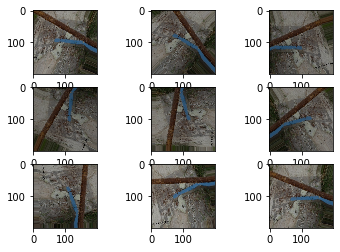

corrosion8.jpg


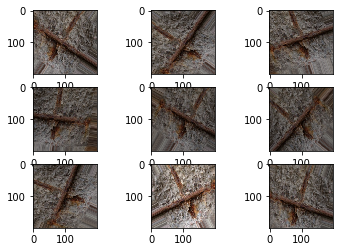

Screenshot_20200523-093411~2.png


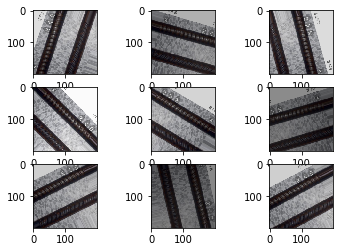

Screenshot_20200523-093554~2.png


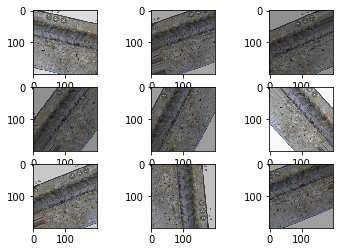

Screenshot_20200523-094219~2.png


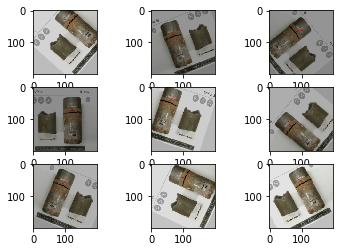

Screenshot_20200523-094232~2.png


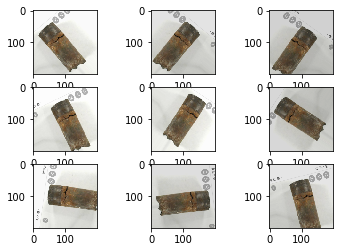

Screenshot_20200523-094241~2.png


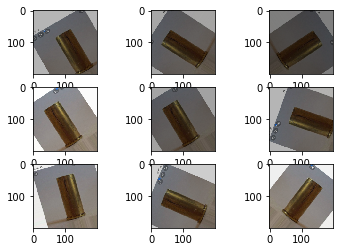

Screenshot_20200523-094316~2.png


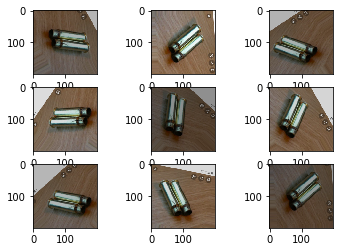

Screenshot_20200523-094407~2.png


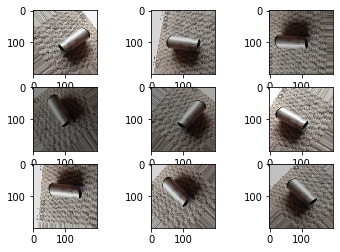

Screenshot_20200523-094448~2.png


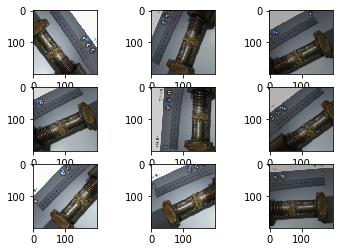

Screenshot_20200523-100115~2.png


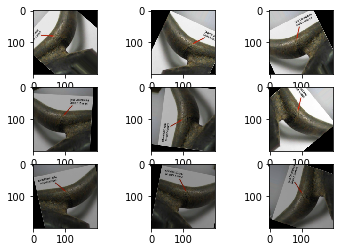

Screenshot_20200523-100215~2.png


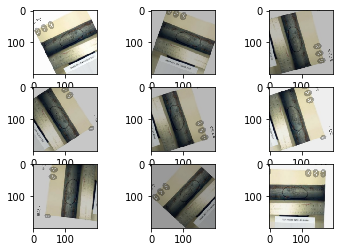

Screenshot_20200523-100303~2.png


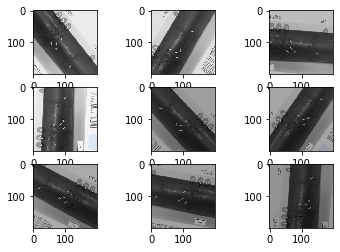

In [3]:
# countz = []
for filename in os.listdir(directory):
    dir2 = directory + filename + "/"
    cnt = 0
    for filename2 in os.listdir(dir2):
        print(filename2)
#         count += 1
#         cnt += 1
        img = load_img(dir2 + filename2)
        img = img.resize((m, n))
        data = img_to_array(img)
        samples = np.expand_dims(data, 0)
        datagen = ImageDataGenerator(rotation_range=90, brightness_range=[0.5,1.0], 
            horizontal_flip=True, height_shift_range=0.1, width_shift_range=[-15,15])
        it = datagen.flow(samples, batch_size=1)
        for i in range(9):
            plt.subplot(330 + 1 + i)
            batch = it.next()
            image = batch[0].astype('uint8')
#             X.append(image)
#             y.append(classLabel)
            plt.imshow(image)
        plt.show()
#     classLabel += 1
#     countz.append(cnt)

In [4]:
countz = []
for filename in os.listdir(directory):
    dir2 = directory + filename + "/"
    cnt = 0
    for filename2 in os.listdir(dir2):
        print(filename2)
        count += 1
        cnt += 1
        img = load_img(dir2 + filename2)
        img = img.resize((m, n))
        data = img_to_array(img)
        samples = np.expand_dims(data, 0)
        datagen = ImageDataGenerator(rotation_range=90, brightness_range=[0.5,1.0], 
            horizontal_flip=True, height_shift_range=0.1, width_shift_range=[-15,15])
        it = datagen.flow(samples, batch_size=1)
        for i in range(30):
#             plt.subplot(330 + 1 + i)
            batch = it.next()
            image = batch[0].astype('uint8')
            X.append(image)
            y.append(classLabel)
#             plt.imshow(image)
#         plt.show()
    classLabel += 1
    countz.append(cnt)

buck10.jpg
buck11.jpg
buck2.jpg
buck3.jpg
buck4.jpg
buck6.jpg
buck7.jpg
buck9.jpg
28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.png
40.png
41.png
42.png
43.jpg
44.png
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
corrosion1.jpg
corrosion3.jpg
corrosion4.jpg
corrosion5.jpg
corrosion6.jpg
corrosion7.jpg
corrosion8.jpg
Screenshot_20200523-093411~2.png
Screenshot_20200523-093554~2.png
Screenshot_20200523-094219~2.png
Screenshot_20200523-094232~2.png
Screenshot_20200523-094241~2.png
Screenshot_20200523-094316~2.png
Screenshot_20200523-094407~2.png
Screenshot_20200523-094448~2.png
Screenshot_20200523-100115~2.png
Screenshot_20200523-100215~2.png
Screenshot_20200523-100303~2.png


In [5]:
X = np.asarray(X)
y = np.asarray(y)
print("Shape of X: " + str(X.shape))
print("Shape of y: " + str(y.shape))
np.save("Train_X", X)
np.save("Train_y", y)
print("Total Images:" + str(count))

Shape of X: (1440, 200, 200, 3)
Shape of y: (1440,)
Total Images:48


[8, 29, 11]


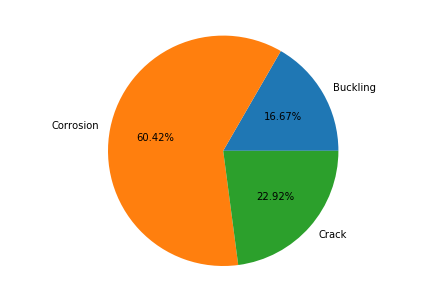

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
fault = ['Buckling', 'Corrosion', 'Crack']
print(countz)
ax.pie(countz, labels = fault, autopct='%1.2f%%')
plt.show()

# Data Preprocessing

        The selected data were resized to make all the image of identical dimension, and then these images were converted into grey scale and were divided by 255 to normalize these data.

In [7]:
import numpy as np
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.utils import np_utils, print_summary, to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import backend as K
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import img_to_array


In [8]:
m,n = 200, 200
num_classes = 3

In [9]:
def preprocessing(filename):
    X = []
    images = np.load(filename)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    for i in range(images.shape[0]):
        new_img = np.dot(images[i], rgb_weights)
        if i%200==0:
            plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
            plt.show()
        X.append(new_img)
    X = np.asarray(X)
    X = X/255
    return X

# Model Architecture


-Sequential type model was used.

-Several type of layers were used for this model and they go as this

     1)Convolution Layer
     
     2)Max pooling
     
     3)Dense layer
     
-Softmax was used to predict the class of the image
        

In [10]:
def hand_model(num):
    num_of_classes = num
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(m, n, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # model.add(Dense(num_of_classes, activation='sigmoid'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

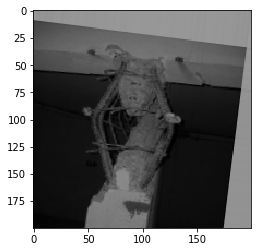

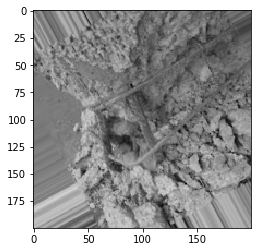

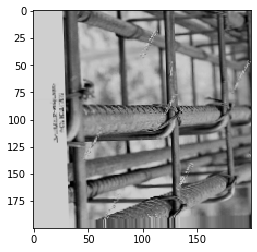

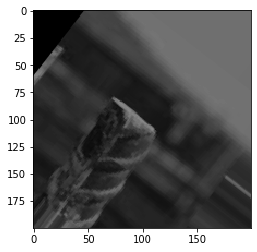

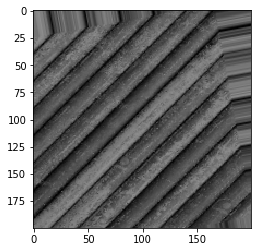

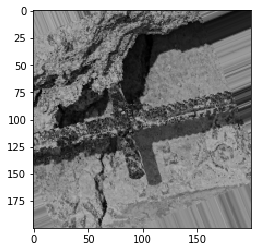

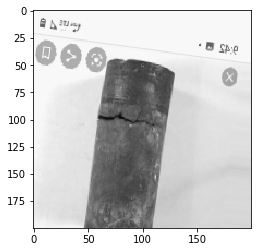

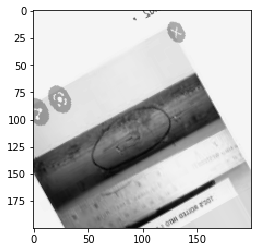



Done Preprocessing


Train on 1296 samples, validate on 144 samples
Epoch 1/15
1296/1296 [==============================] - 88s 68ms/step - loss: 0.9913 - accuracy: 0.5980 - val_loss: 0.8767 - val_accuracy: 0.6250
Epoch 2/15
1296/1296 [==============================] - 86s 66ms/step - loss: 0.8717 - accuracy: 0.6019 - val_loss: 0.8506 - val_accuracy: 0.6250
Epoch 3/15
1296/1296 [==============================] - 85s 65ms/step - loss: 0.8054 - accuracy: 0.5934 - val_loss: 0.6842 - val_accuracy: 0.6528
Epoch 4/15
1296/1296 [==============================] - 86s 67ms/step - loss: 0.7584 - accuracy: 0.6435 - val_loss: 0.6223 - val_accuracy: 0.7153
Epoch 5/15
1296/1296 [==============================] - 85s 66ms/step - loss: 0.6145 - accuracy: 0.7338 - val_loss: 0.6929 - val_accuracy: 0.7569
Epoch 6/15
1296/1296 [==============================] - 86s 67ms/step - loss: 0.4904 - accuracy: 0.8040 - val_loss: 0.5518 - val_accuracy: 0.7639
Epoch 7/15
1296/1296 [==============================] 

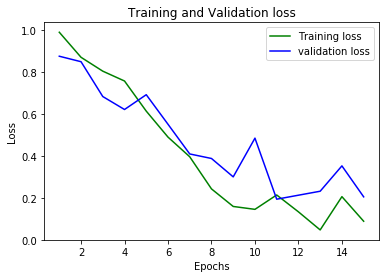

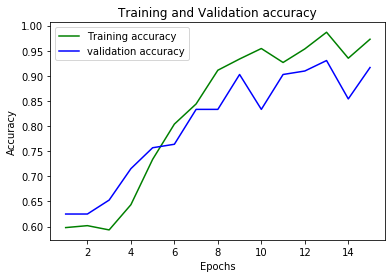

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)      

In [11]:
def main():
    filename = "Train_X.npy"
    TrainX = preprocessing(filename)
    print("\n\nDone Preprocessing\n\n")
    TrainY = np.load("Train_y.npy")
    model = hand_model(num_classes)
    TrainX, TrainY = shuffle(TrainX, TrainY)
    TrainY = to_categorical(TrainY)
    train_x, test_x, train_y, test_y = train_test_split(TrainX, TrainY, random_state=0, test_size=0.1)
    train_x = np.reshape(train_x, (train_x.shape[0], m, n, 1))
    test_x = np.reshape(test_x, (test_x.shape[0], m, n, 1))
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=15, batch_size=32)

    model.evaluate(test_x, test_y)
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    epochs = range(1,16) 
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    loss_train = history.history['accuracy']
    loss_val = history.history['val_accuracy']
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    model.summary()
    model.save("model.h5")


main()

In [2]:
import numpy as np
from numpy import loadtxt
from keras import models
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
def Plot(img):
    model = load_model("model.h5")
    path_to_image = "Dataset/Corrosion/46.jpg"

    layer_outputs = [layer.output for layer in model.layers[:8]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    activations = activation_model.predict(img)
    first_layer_activation = activations[0]
    plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
    plt.show()

    layer_names = []
    for layer in model.layers[:8]:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        # print(size, n_cols, images_per_row, size)
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)      

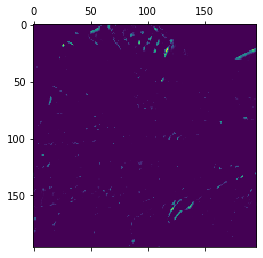

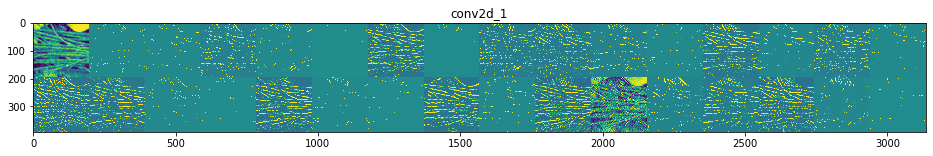

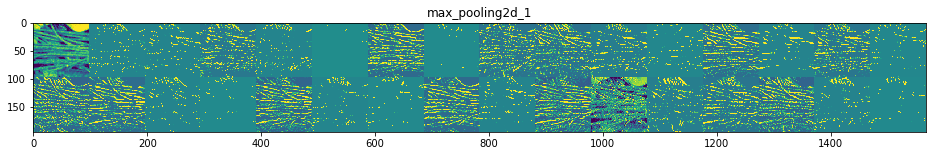

C:\Users\rhris\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


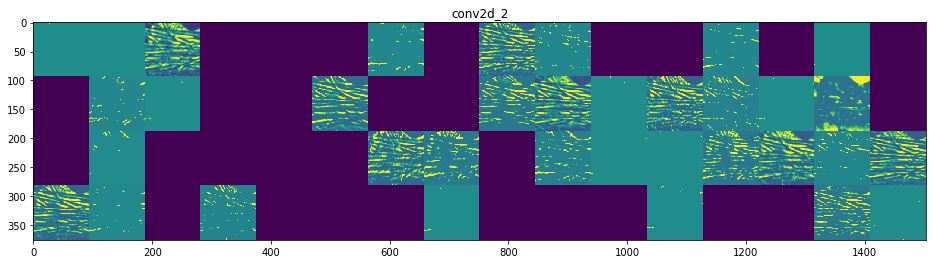

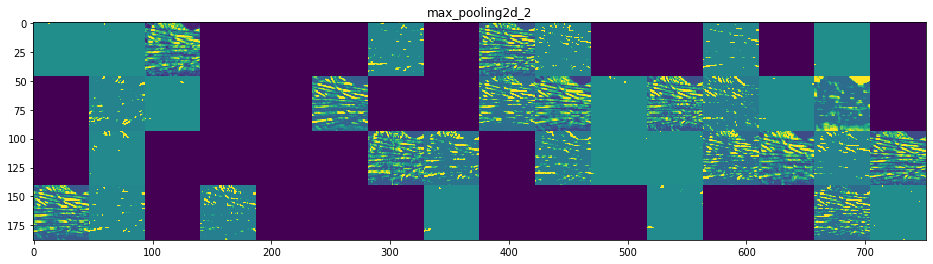

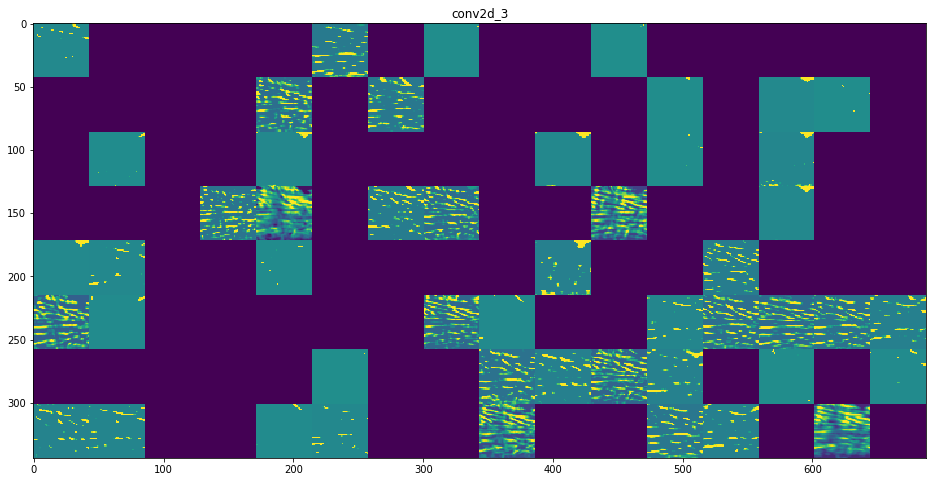

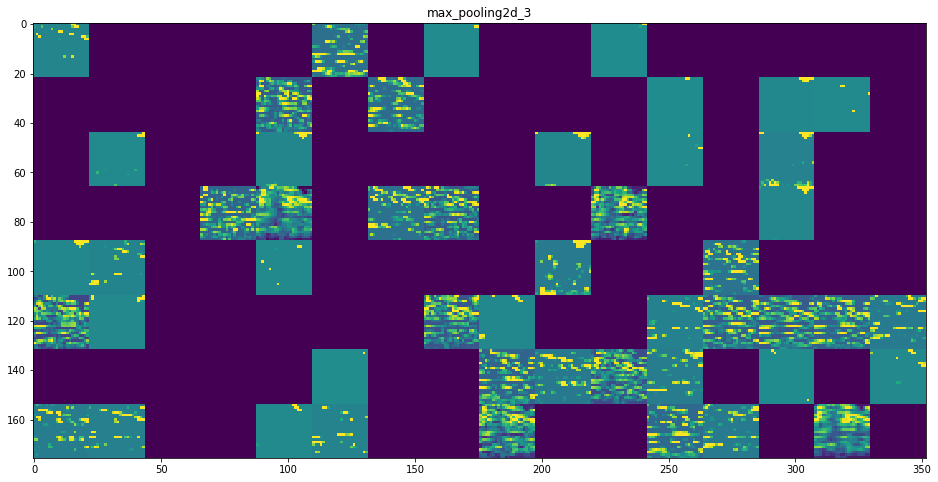

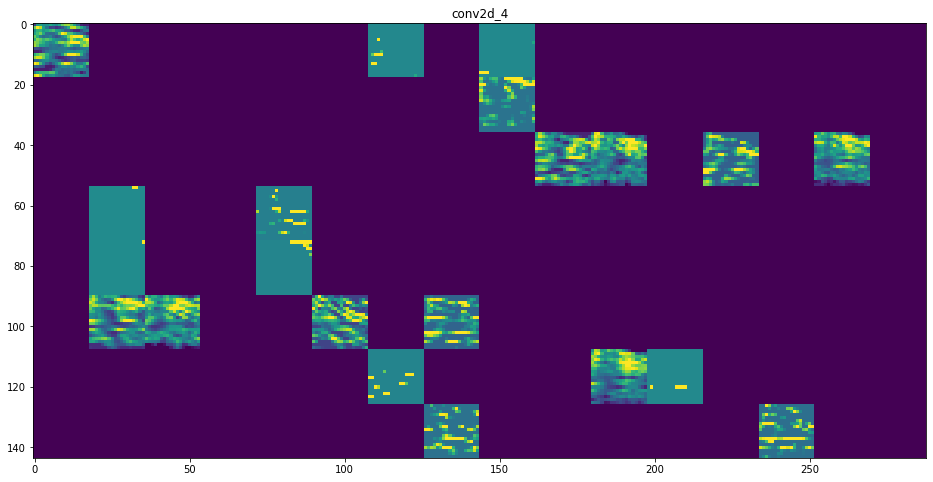

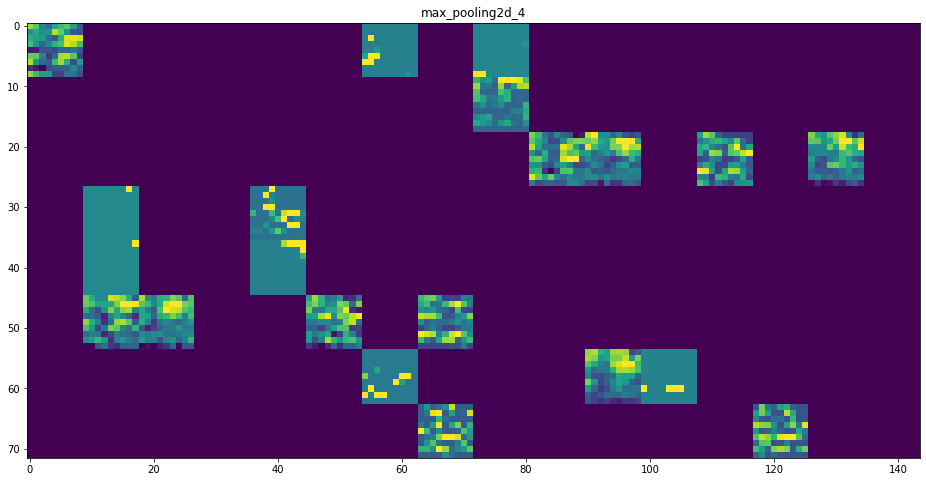

In [8]:
def main():
    filename = "test.png"
    m,n = 200, 200

    model = load_model("model.h5")
    model.summary()

    img = load_img(filename)
    img = img.resize((m, n))
    img = img_to_array(img)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    img = np.dot(img, rgb_weights)
    img = np.reshape(img, (1, m, n, 1))
    y = model.predict(img)
    labels = ["Buckling", "Corrosion", "Crack"]
    print(str(labels[np.argmax(y)]) + " with " + str(np.max(y)*100) + "% confidence.")
    Plot(img)

main()